## GOAL

Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

## Outcome
The variables that are significant in predicting the demand for shared bikes (at least 3).


## Importing Libraries

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [323]:
df = pd.read_csv('C:\\Users\\Neeraj-PC\\Downloads\\day.csv')

In [324]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## ANALYSING DATA

In [325]:
#We can drop 'instant' and 'dteday' columns bcz these are not relevant in predicting the target
df = df.drop(columns=['instant','dteday'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [326]:
#Checking if there are any Null Values present in our Data
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [327]:
#Checking DataTypes of all columns
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [328]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [329]:
#Splitting our Data
X = df.drop(columns=['cnt'],axis=1)
y = df['cnt']

In [330]:
X.shape

(730, 13)

In [331]:
y.shape

(730,)

In [332]:
df.corr().abs()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000e+00,3.279074e-16,8.310321e-01,0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,0.229607,0.208737,0.410310,0.404584
yr,3.279074e-16,1.000000e+00,5.162656e-16,0.008195,0.000685,0.011852,0.050322,0.048789,0.047215,0.112547,0.011624,0.250502,0.596911,0.569728
mnth,8.310321e-01,5.162656e-16,1.000000e+00,0.018905,0.004059,0.010414,0.045613,0.219083,0.226430,0.224937,0.208013,0.121208,0.291952,0.278191
holiday,1.086804e-02,8.195345e-03,1.890483e-02,1.000000,0.020145,0.257009,0.034395,0.028764,0.032703,0.015662,0.006257,0.054055,0.109142,0.068764
weekday,4.012478e-03,6.852851e-04,4.059002e-03,0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,0.017230,0.350848,0.199326,0.036183
workingday,1.786841e-02,1.185197e-02,1.041372e-02,0.257009,0.001588,1.000000,0.026332,0.002044,0.010657,0.053770,0.002453,0.090369,0.005466,0.027640
weathersit,2.130636e-02,5.032247e-02,4.561335e-02,0.034395,0.034216,0.026332,1.000000,0.119503,0.120559,0.590277,0.039769,0.246044,0.259025,0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,0.028764,0.044876,0.002044,0.119503,1.000000,0.991696,0.128565,0.158186,0.542731,0.539436,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,0.032703,0.037964,0.010657,0.120559,0.991696,1.000000,0.141512,0.183876,0.543362,0.543678,0.630685
hum,2.082196e-01,1.125471e-01,2.249368e-01,0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,0.248506,0.075211,0.089212,0.098543


<AxesSubplot:>

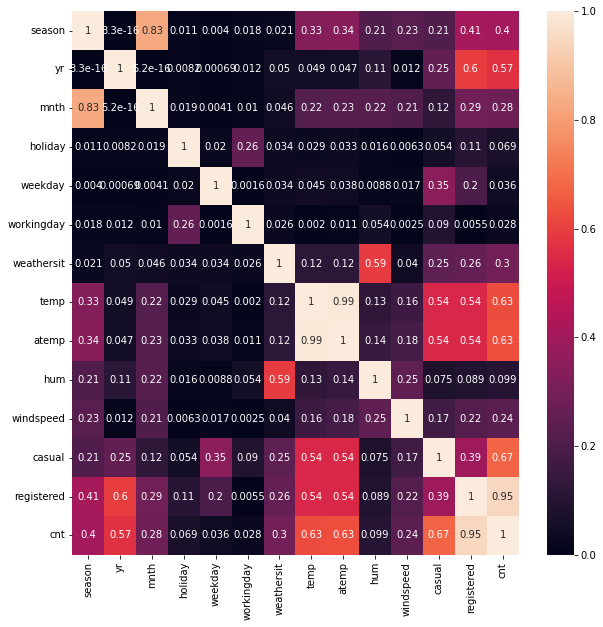

In [333]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr().abs(),annot=True)

In [334]:
# we are taking the absolute values here bcz whether the feature is negative correlated or positive correlated, it will impact our Target.
# Bcz a Negative correlated feature is also important for our target.
corr = df.corr().stack().abs()

In [335]:
cnt_corr = corr['cnt'].sort_values(ascending=False)
cnt_corr

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
yr            0.569728
season        0.404584
weathersit    0.295929
mnth          0.278191
windspeed     0.235132
hum           0.098543
holiday       0.068764
weekday       0.036183
workingday    0.027640
dtype: float64

In [336]:
cnt_corr[1:4]

registered    0.945411
casual        0.672123
atemp         0.630685
dtype: float64

In [337]:
print("Our 3 most important features are : \n",cnt_corr[1:4])

Our 3 most important features are : 
 registered    0.945411
casual        0.672123
atemp         0.630685
dtype: float64


## Observations Till Now
We have seen that in Heatmap and Correlation Chart our most important features are ("registered","casual","atemp").

## To cross check and Prove this :
We will train our model only on these 3 important features and we will check the accuracy of our Model to prove that these 3 features are the most important and sifnificant in predicting our Target.

In [338]:
data = df['registered'],df['casual'],df['atemp']

In [339]:
data=pd.DataFrame(data)

In [340]:
X = data.T

In [341]:
X

,registered,casual,atemp
0,654.0,331.0,18.18125
1,670.0,131.0,17.68695
2,1229.0,120.0,9.47025
3,1454.0,108.0,10.60610
4,1518.0,82.0,11.46350
...,...,...,...
725,1867.0,247.0,11.33210
726,2451.0,644.0,12.75230
727,1182.0,159.0,12.12000
728,1432.0,364.0,11.58500


In [342]:
y = df['cnt']

In [343]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [344]:
X.shape , y.shape

((730, 3), (730,))

In [345]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [346]:
x_train.shape , y_train.shape

((584, 3), (584,))

In [347]:
x_test.shape , y_test.shape

((146, 3), (146,))

In [348]:
model = LinearRegression()

In [349]:
model.fit(x_train,y_train)

LinearRegression()

In [350]:
model.score(x_train,y_train)

1.0

In [351]:
model.score(x_test,y_test)

1.0

In [352]:
y_pred = model.predict(x_test)

In [353]:
accuracy = r2_score(y_pred,y_test)*100

In [354]:
print("Accuracy of our Model is : ",accuracy,"%")

Accuracy of our Model is :  100.0 %


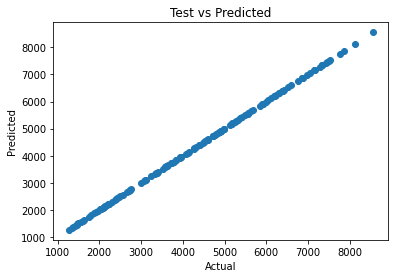

Accuracy : 100.0


In [355]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Test vs Predicted")
plt.show()
print("Accuracy :",accuracy)

In [356]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [357]:
pred_df

,Actual Value,Predicted Value,Difference
468,7460,7460.0,9.094947e-13
148,4788,4788.0,1.818989e-12
302,3331,3331.0,4.547474e-13
355,3068,3068.0,0.000000e+00
515,7338,7338.0,-9.094947e-13
...,...,...,...
404,3830,3830.0,-4.547474e-13
390,4075,4075.0,-4.547474e-13
218,3785,3785.0,9.094947e-13
135,3958,3958.0,0.000000e+00


## Features with Less Correlation with target variable:

Let's take the 3 less correlated features with the target variable.

In [358]:
cnt_corr[-3:]

holiday       0.068764
weekday       0.036183
workingday    0.027640
dtype: float64

In [359]:
print("Our 3 least important features are : \n",cnt_corr[-3:])

Our 3 least important features are : 
 holiday       0.068764
weekday       0.036183
workingday    0.027640
dtype: float64


In [360]:
data = df['holiday'],df['weekday'],df['weekday']

In [361]:
data = pd.DataFrame(data)

In [362]:
X = data.T

In [363]:
y = df['cnt']
X.shape , y.shape

((730, 3), (730,))

In [364]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((584, 3), (584,), (146, 3), (146,))

In [365]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [366]:
model.score(x_train,y_train)

0.011165557342548427

In [367]:
model.score(x_test,y_test)

-0.03244769552887217

In [368]:
y_pred = model.predict(x_test)

In [369]:
accuracy = r2_score(y_pred,y_test)

In [370]:
accuracy

-161.41761776762652

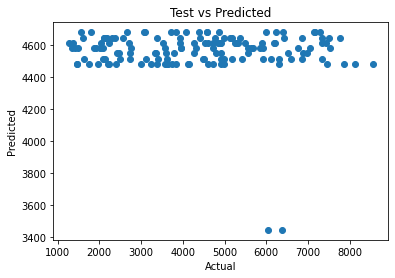

Accuracy : -161.41761776762652


In [371]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Test vs Predicted")
plt.show()
print("Accuracy :",accuracy)

## Observation
At first we have choosen 3 highly correlated features, which gave an accuracy of 100%.

The features are: ( atemp,casual,registered )

Then we have choosen 3 least correlated features, which gave an negative accuracy. We can also observe from the scatter plot that the model performed badly on these least correlated features.

The features are: ( holiday,weekday,workingday )

#### **Note : **
##### *Most important thing in this process is to remember that we have to consider absolute values of the correlations, otherwise we will get different least correlated features. They are negative correlated it doesn't mean they are not important for us.*


#### So our 3 most important features are ( "registered", "casual", "atemp" )